In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

## Ler breast cancer dataset

Esse dataset contém dados de pacientes com tumores de mama, você tentará prever se um tumor é maligno ou benigno de acordo com a espessura do tumor. No gráfico abaixo você pode visualizar os tipos de tumores (1 = maligno, 0 = benigno) por categoria de espessura.

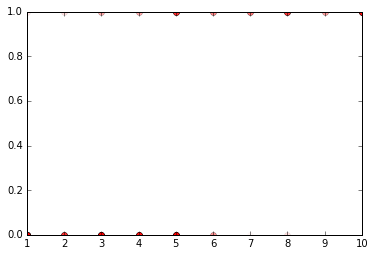

In [2]:
x = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",
                header=None)

y = np.array(x[10])
y[y==2] = 0
y[y==4] = 1
x = np.array(x[1])

plt.plot(x,y,'ro', alpha = 0.03)
plt.show()

### Código para o gradient descent

Conforme implementado na Semana 1, o código abaixo é responsável por definir as funções do gradient descent.

In [ ]:
def logverossimil(x, y, w, b):
    return (b * np.sum(y)) + (w * np.sum(x * y)) - (np.sum(np.log(1 + np.exp(b + w *x))))


def plot_logverossimil(wmin,wmax,bmin,bmax, history = None, x=x, y=y):
    wrange = np.arange(wmin,wmax,0.1)
    brange = np.arange(bmin,bmax,0.1)
    v = []
    for w in wrange:
        vaux = []
        for b in brange:
            vaux.append(logverossimil(x,y,w,b))
        v.append(np.array(vaux))
    v = np.array(v)

    fig, ax = plt.subplots()
    CS = ax.contour(brange, wrange, v)
    plt.xlabel("b", fontsize = 16)
    plt.ylabel("w", fontsize = 16)
    ax.clabel(CS, inline=1, fontsize=11, fmt='%1.f')
    if not(history is None):
        plt.plot(history[:,0],history[:,1],color='k',linestyle='-', linewidth=0.5, marker='o',alpha=0.5,markersize=4)
    plt.title ("Log-verossimilhança por W e b")
    plt.show()

def derivatives(x,y,w,b):
    derivs = np.zeros(2)
    derivs[0] = np.sum(y-1/(1+np.exp(-(w*x+b))))
    derivs[1] = np.sum(x*(y-1/(1+np.exp(-(w*x+b)))))
    return derivs

def gradient_descent(x, y, b_init, w_init, learning_rate):
    params = np.array([b_init, w_init]) 
    past_params = np.array([10,10])

    history = [params] #armazene o histórico de valores nesse vetor
    iters = 0
    diff = np.array([10,10]) #para ser usado na condição de parada

    while iters < 3000 and np.max(diff) > 1e-5: #condição de parada do algoritmo (n de iterações e convergência)
        b, w = params[0], params[1]
        past_params = params
        params = params + learning_rate*derivatives(x,y,w,b)
        diff = abs(params - past_params)
        history.append(params)
        iters += 1

    history = np.array(history)
    return history


## Exercício 01:

### Normalização
No código abaixo iremos visualizar o efeito da normalização dos inputs no gradient descent. Execute o algoritmo nos dados não normalizados, depois normalize os dados e execute-o novamente. Imprima o número de iterações necessários para a convergência das duas execuções.


In [ ]:
history = #execute o gradient descent com os dados não normalizados
plot_logverossimil(np.min(history[:,1]),np.max(history[:,1]),np.min(history[:,0]),np.max(history[:,0]), history)

x_norm = #normalize os dados

history_norm = #execute o gradient descent com os dados normalizados
plot_logverossimil(np.min(history_norm[:,1]),np.max(history_norm[:,1]),np.min(history_norm[:,0]),np.max(history_norm[:,0]), history_norm)

#imprima o número de iterações das duas execuções

## Exercício 02:
Implemente a função do gradient descent com momentum.

### Gradiente com momentum

In [ ]:
def gradient_descent_momentum(x, y, b_init, w_init, learning_rate, beta):
    #Implemente aqui a função do gradient com momentum

In [ ]:
history = gradient_descent(x,y, 0,0, 0.001)
plot_logverossimil(np.min(history[:,1]),np.max(history[:,1]),np.min(history[:,0]),np.max(history[:,0]), history)

history_momentum = gradient_descent_momentum(x,y,0,0, 0.005, 0.9)
plot_logverossimil(np.min(history_momentum[:,1]),np.max(history_momentum[:,1]),np.min(history_momentum[:,0]),np.max(history_momentum[:,0]), history_momentum, x=x)

print("num iterations gd:", len(history))
print("num iterations gd w/ momentum:", len(history_momentum))

## Exercício 03:
Implemente a função do gradient descent RMSprop.

### RMSprop

In [ ]:
def gradient_descent_rmsprop(x, y, b_init, w_init, learning_rate, beta):
    #Implemente aqui a função do RMSprop

In [ ]:
history_rmsprop = gradient_descent_rmsprop(x,y,0,0, 0.01, 0.999)
plot_logverossimil(np.min(history_rmsprop[:,1]),np.max(history_rmsprop[:,1]),np.min(history_rmsprop[:,0]),np.max(history_momentum[:,0]), history_rmsprop, x=x)

print("num iterations gd w/ rmsprop:", len(history_rmsprop))

## Exercício 04:
Implemente a função do gradient descent Adam.

### Adam

In [ ]:
def gradient_descent_adam(x, y, b_init, w_init, learning_rate, beta1, beta2):
    #Implemente aqui a função do Adam

In [ ]:
history_adam = gradient_descent_adam(x,y,0,0, 0.05, 0.9, 0.999)
plot_logverossimil(np.min(history_adam[:,1]),np.max(history_adam[:,1]),np.min(history_adam[:,0]),np.max(history_adam[:,0]), history_adam, x=x)

print("num iterations gd w/ adam:", len(history_adam))